In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
pd.options.display.max_rows = 50
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [37]:
ChurnData=pd.read_csv("DATA_Customer-Churn.csv")

In [38]:
ChurnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [39]:
## Check the data types
ChurnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [40]:
## Convert column TotalCharges into a numeric type
ChurnData['TotalCharges'] = pd.to_numeric(ChurnData['TotalCharges'], errors='coerce')

In [41]:
ChurnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [42]:
## Check the null values in the dataframe
ChurnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
ChurnData['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [44]:
## Mean of TotalCharges
mean_number_TotalCharges = round(ChurnData["TotalCharges"].mean(),1)
mean_number_TotalCharges

2283.3

In [45]:
## Replace the null values with the mean (2283.3)
ChurnData["TotalCharges"] = ChurnData["TotalCharges"].fillna(mean_number_TotalCharges)

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

In [46]:
numerical = ChurnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges','Churn']]
numerical

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


In [47]:
## Replace the Yes and No with 0,1
numerical['Churn'] = numerical['Churn'].replace({'Yes': "1"})
numerical['Churn'] = numerical['Churn'].replace({'No': "0"})

In [48]:
numerical

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [49]:
numerical['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [50]:
## Churn is an object we need to change it to integer
numerical.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
Churn              object
dtype: object

In [51]:
## Convert column TotalCharges into a numeric type
numerical['Churn'] = pd.to_numeric(numerical['Churn'], errors='coerce')

In [52]:
## Churn is an object we need to change it to integer
numerical.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
Churn               int64
dtype: object

# Logistic Regression & Standard Scaler

In [53]:
## X, Y Split
## Add Churn to Y and delete it from x
X = numerical.drop(columns=['Churn'], axis = 1)
y = numerical['Churn']

# One Hot/Label Enconding (categorical).

In [54]:
## Get all the categorical values

categorical_features = ChurnData.select_dtypes("object")
categorical_features

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [55]:
## Drop our target value Churn
categorical_features_no_target = categorical_features.drop(columns=['Churn'], axis = 1)

In [56]:
categorical_features_no_target

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [111]:
## Convert the categorial columns's values to binary numerical
## drop_first=true will drop one value from each of the columns. If we had 3 values inside a column after drop_first = true we end up with just 2

categorical_dummies = pd.get_dummies(categorical_features_no_target, drop_first=True)
categorical_dummies

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Concatenate the categorical and the numerical values

In [197]:
X_cat_num = pd.concat([categorical_dummies, numerical],axis=1)
X_cat_num

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34,0,56.95,1889.50,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,45,0,42.30,1840.75,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,24,0,84.80,1990.50,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,72,0,103.20,7362.90,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,29.60,346.45,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,74.40,306.60,1


# Logistic Regression - Categorical & Numerical

In [198]:
## The results are going to be the same if I keep always the same number in random_state. It helps to have consistency

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)


ValueError: Found input variables with inconsistent numbers of samples: [10348, 7043]

In [199]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.758517,0.762319
1,Precision,0.738964,0.754306
2,Recall,0.796166,0.790123


Confusion matrix for the train set
[[2998 1159]
 [ 840 3281]]


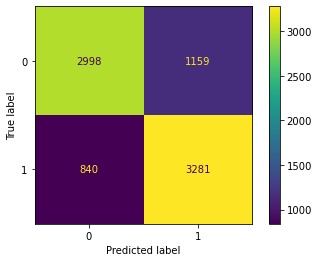



Confusion matrix for the test set
[[746 271]
 [221 832]]


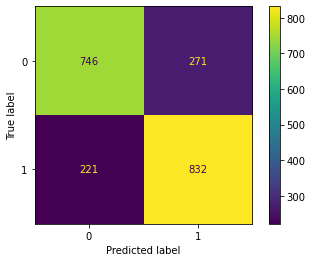

In [200]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

# KNNClassifier - Categorical & Numerical

In [201]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
log_model = KNeighborsClassifier() 

## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [10348, 7043]

In [131]:
##KNNClassifier

log_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [5634, 2990]

# Decision Trees - Categorical & Numerical

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


Confusion matrix for the train set
[[3339  756]
 [ 294  541]]


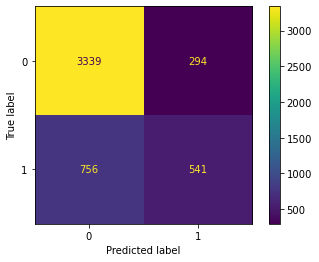



Confusion matrix for the test set
[[1433  360]
 [ 108  212]]


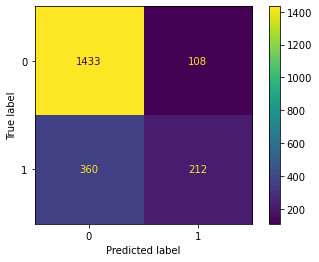

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

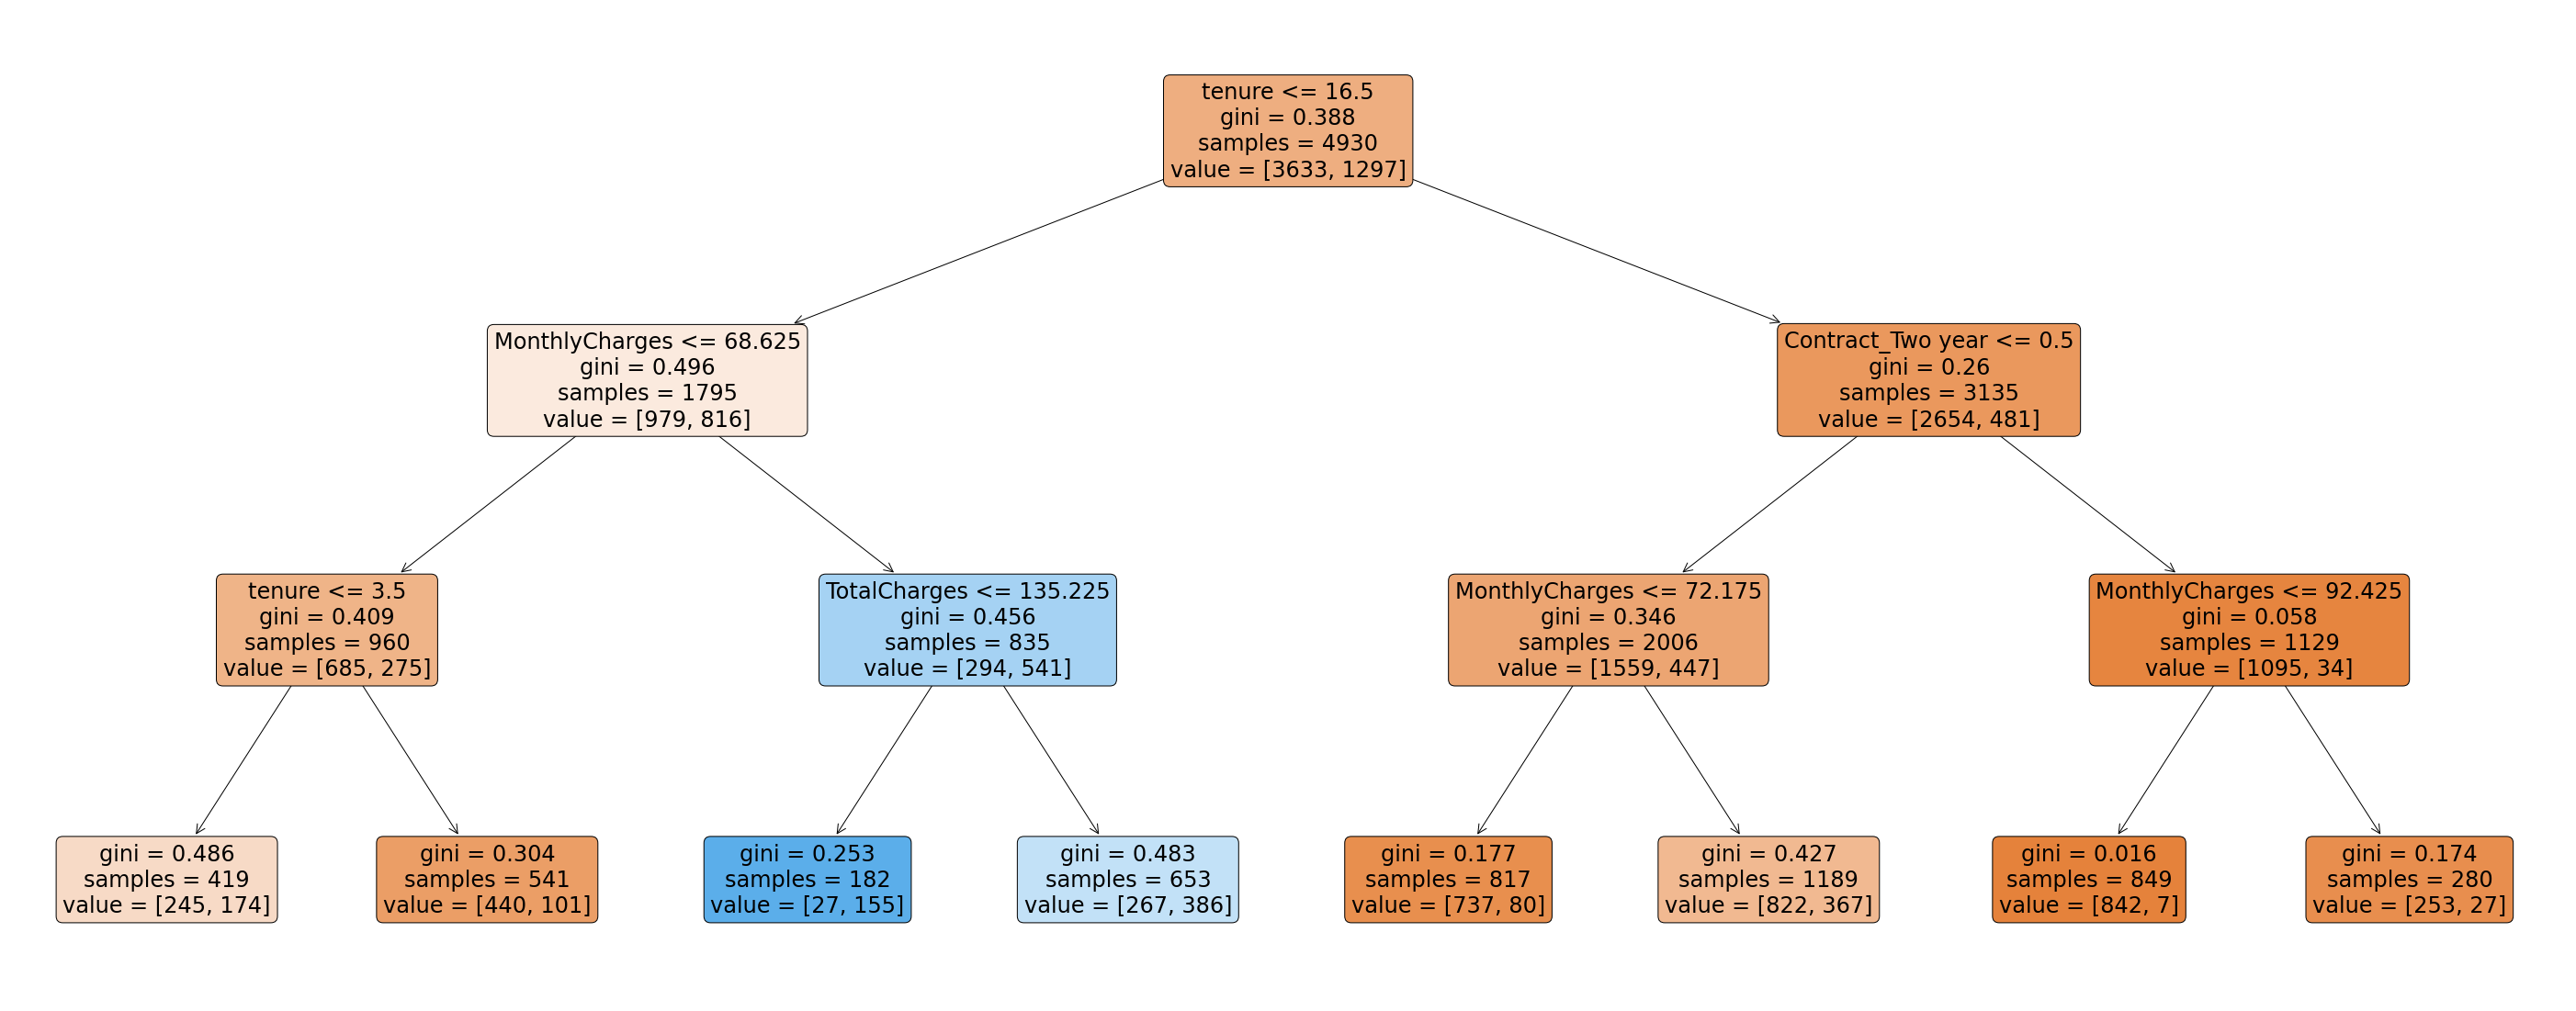

In [65]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# Cros validation

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [66]:
## Use cross validation for the decision model tree (numerical & categorical)

In [70]:
X_cat_num = pd.concat([X_cat_num,y],axis=1)
X_cat_num

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [132]:
set(y)

{0, 1}

In [133]:
## Avg. of the R square of the 5 features and the standard deviation
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.68227425, 0.67391304, 0.72073579, 0.7006689 , 0.71237458])

In [134]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.02


In [135]:
y_test

4394    0
3936    0
299     1
6534    0
3449    0
       ..
1250    0
1089    0
5996    0
666     1
1977    0
Name: Churn, Length: 748, dtype: int64

In [136]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

# Models comparison

In [137]:
### Compare different models to see, which one has the highest accuracy.
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'DecisionTreeClassifier': 0.6906354515050167, 'LogisticRegression': 0.7638795986622074, 'KNeighborsClassifier': 0.6979933110367892}


# Managing imbalance in the dataset

# Downsampling

In [138]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [139]:
X_cat_num

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34,0,56.95,1889.50,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,45,0,42.30,1840.75,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,24,0,84.80,1990.50,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,72,0,103.20,7362.90,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,29.60,346.45,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,74.40,306.60,1


In [140]:
## around 25% of the customer want to churn
5174/len(X)

1.3841626538255751

In [141]:
category_0 = X_cat_num[X_cat_num['Churn'] ==0]
category_1 = X_cat_num[X_cat_num['Churn'] ==1]

In [142]:
category_0.shape

(5174, 23)

In [143]:
category_1.shape

(1869, 23)

In [144]:
category_0_down = category_0.sample(len(category_1,))


In [145]:
X = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
X = X.sample(frac=1)
X['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# The data had been downsampled, now I will run the logistic regression model again

In [146]:
## X, Y Split
## Add Churn to Y and delete it from x
X_down = X.drop(columns=['Churn'], axis = 1)


In [147]:
y_down = X['Churn']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size = 0.20, random_state = 123)


In [149]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.759866,0.778075
1,Precision,0.738124,0.749386
2,Recall,0.808000,0.826558


Confusion matrix for the train set
[[1060  430]
 [ 288 1212]]


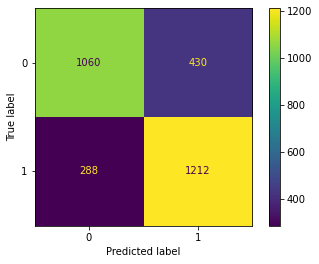



Confusion matrix for the test set
[[277 102]
 [ 64 305]]


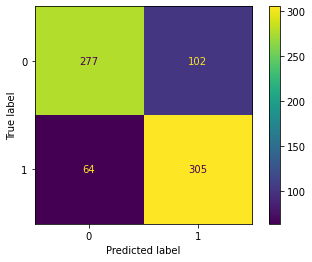

In [150]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

# Upsampling Method 1

In [151]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 23)


In [202]:
X_cat_num

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34,0,56.95,1889.50,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,45,0,42.30,1840.75,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,24,0,84.80,1990.50,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,72,0,103.20,7362.90,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,29.60,346.45,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,74.40,306.60,1


In [203]:
X_cat_num = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
X_cat_num = X_cat_num.sample(frac=1)
X_cat_num['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [204]:
## X, Y Split
## Add Churn to Y and delete it from x
X_up = X_cat_num.drop(columns=['Churn'], axis = 1)


In [205]:
y_up = X_cat_num['Churn']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.20, random_state=11)

In [207]:
## Apply logistic regression
log_model = LogisticRegression() 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.760933,0.758937
1,Precision,0.741698,0.739763
2,Recall,0.802314,0.792398


Confusion matrix for the train set
[[2971 1159]
 [ 820 3328]]


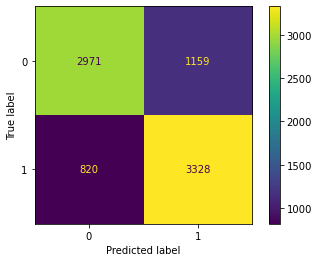



Confusion matrix for the test set
[[758 286]
 [213 813]]


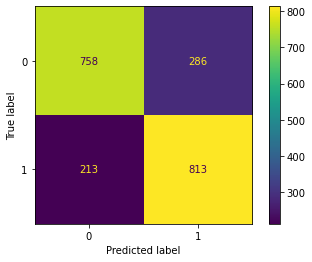

In [208]:
## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Upsampling using SMOTE

In [209]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [211]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [212]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [213]:
X_cat_num_sm, y_sm = smote.fit_resample(X_cat_num, y)
y_sm.value_counts()

ValueError: Found input variables with inconsistent numbers of samples: [10348, 7043]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

ValueError: Found input variables with inconsistent numbers of samples: [10348, 7043]

In [184]:
## Apply logistic regression
log_model = LogisticRegression() 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.758517,0.762319
1,Precision,0.738964,0.754306
2,Recall,0.796166,0.790123


Confusion matrix for the train set
[[2998 1159]
 [ 840 3281]]


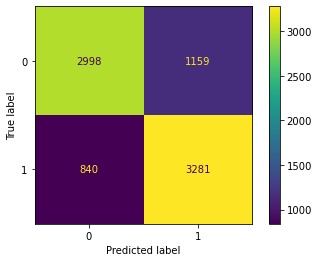



Confusion matrix for the test set
[[746 271]
 [221 832]]


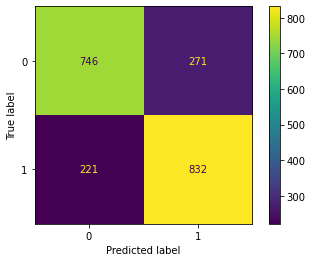

In [185]:
## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Conclusions

In [168]:
## Total abslolute number of people that will churn
ChurnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [169]:
## 26% of the customers will churn
1869/len(['Churn'])

1869.0

# Random forest

In [112]:
# We will balance the dataset Here we will downsample category 0, so that the model trains faster

In [218]:
X_cat_num


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
4350,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,44.55,1462.60,0
591,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,46,0,24.90,1174.80,0
2465,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,35.25,35.25,1
6062,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,53,1,73.80,4003.85,0
2213,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,12,0,25.25,274.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,63,0,81.15,5224.50,0
6776,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,62,1,79.95,4819.75,0
3180,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,3,0,20.00,63.60,0
1530,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,2,0,90.00,190.05,1


In [220]:
X_cat_num


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
4350,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,44.55,1462.60,0
591,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,46,0,24.90,1174.80,0
2465,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,35.25,35.25,1
6062,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,53,1,73.80,4003.85,0
2213,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,12,0,25.25,274.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,63,0,81.15,5224.50,0
6776,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,62,1,79.95,4819.75,0
3180,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,3,0,20.00,63.60,0
1530,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,2,0,90.00,190.05,1
